## Some more trivial analysis of user clusters
Trying to find some more obvious patterns in users behaviour

In [1]:
from src.data_loader import *
import seaborn as sn
import matplotlib.pyplot as plt

df_unfinished = read_unfinished_paths()
df_finished = read_finished_paths()
df_finished

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th century;15th century;16th century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th century;Europe;Africa;Atlantic slave trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th century;Niger;Nigeria;British Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th century;Renaissance;Ancient Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th century;Italy;Roman Catholic Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,2012-10-03 02:23:35,66,Yagan;Ancient Egypt;Civilization,NaN
51314,2ef7ac844cefda58,2011-03-16 05:42:18,165,Yagan;Folklore;Brothers Grimm;<;19th century;C...,3.0
51315,12863abb7887f890,2013-11-22 04:42:52,228,Yagan;Australia;England;France;United States;T...,NaN
51316,19f8284371753362,2011-02-27 07:42:47,56,"Yarralumla, Australian Capital Territory;Austr...",1.0


In [49]:
df_unfinished

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,2011-02-07 05:02:15,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,2011-02-07 05:14:11,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,2011-02-07 15:00:19,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,2011-02-07 16:06:01,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,2011-02-07 17:18:25,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,2014-01-15 12:06:45,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,2014-01-15 12:08:17,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,2014-01-15 15:06:40,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,2014-01-15 15:24:41,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


In [50]:
print(f"The mean duration of unfinished paths is {df_unfinished['durationInSec'].mean():.0f} seconds")
print(f"The mean duration of finished paths is {df_finished['durationInSec'].mean():.0f} seconds")

The mean duration of unfinished paths is 835 seconds
The mean duration of finished paths is 158 seconds


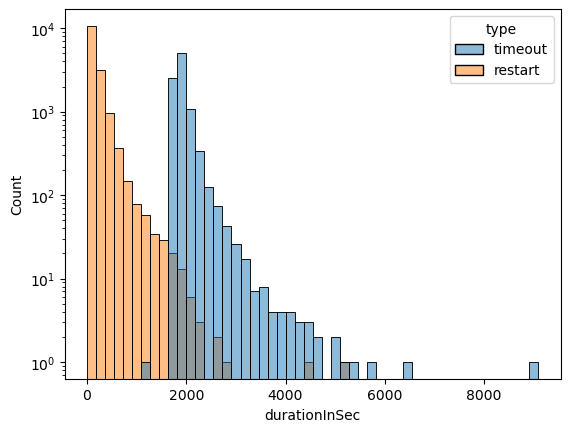

In [51]:
sn.histplot(df_unfinished, x='durationInSec', hue='type', bins=50)
plt.yscale('log')

Text(0.5, 1.04, 'Path length by rating')

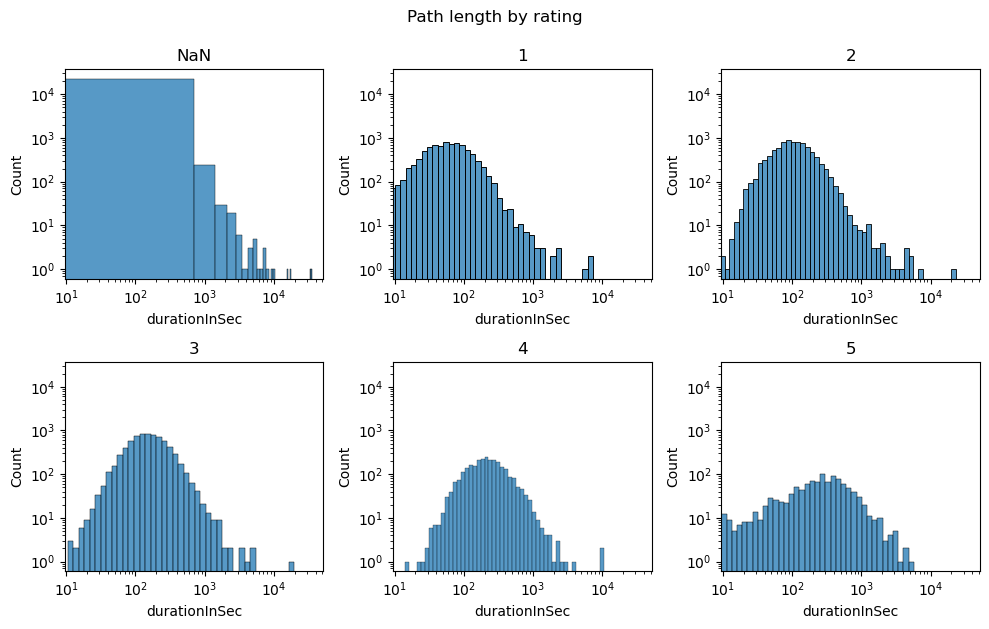

In [ ]:
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(231)
sn.histplot(df_finished[df_finished['rating'].isnull()], x='durationInSec', bins=50)
plt.yscale('log')
plt.xscale('log')
plt.title('NaN')


for i in range(1, 6):
    plt.subplot(231+i, sharex = ax1, sharey=ax1)
    sn.histplot(df_finished[df_finished['rating']==i], x='durationInSec', bins=50)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(i)

plt.tight_layout()
plt.suptitle('Path duration by rating', y=1.04)

In [53]:
df_unfinished['path_length'] = df_unfinished['path'].apply(lambda x: x.count(';') + 1)
df_unfinished['back_clicks'] = df_unfinished['path'].apply(lambda x: x.count('<'))
df_finished['path_length'] = df_finished['path'].apply(lambda x: x.count(';') + 1)
df_finished['back_clicks'] = df_finished['path'].apply(lambda x: x.count('<'))

print(f"The mean path length of unfinished paths is {df_unfinished['path_length'].mean():.0f}, using an average of {df_unfinished['back_clicks'].mean():.1f} back clicks")
print(f"The mean path length of finished paths is {df_finished['path_length'].mean():.0f}, using an average of {df_finished['back_clicks'].mean():.1f} back clicks")

The mean path length of unfinished paths is 5, using an average of 0.5 back clicks
The mean path length of finished paths is 7, using an average of 0.4 back clicks


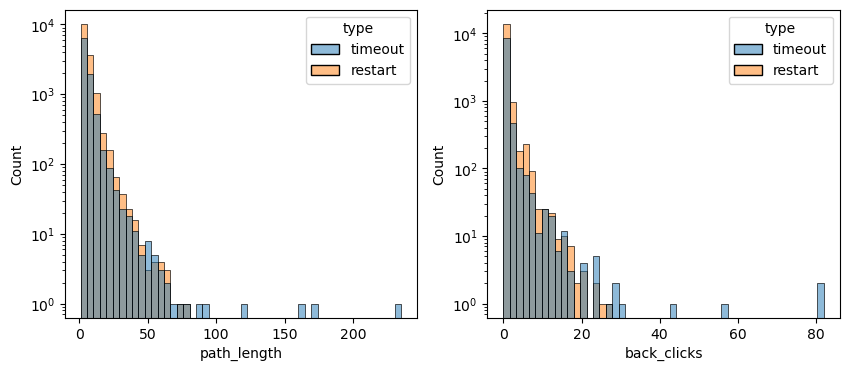

In [54]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
sn.histplot(df_unfinished, x='path_length', hue='type', bins=50)
plt.yscale('log')

plt.subplot(122)
sn.histplot(df_unfinished, x='back_clicks', hue='type', bins=50)
plt.yscale('log')


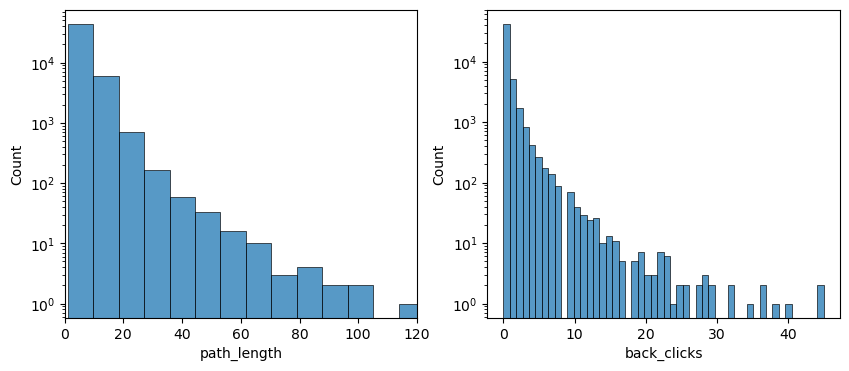

In [55]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
sn.histplot(df_finished, x='path_length', bins=50)
plt.yscale('log')
plt.xlim(0, 120)

plt.subplot(122)
sn.histplot(df_finished, x='back_clicks', bins=50)
plt.yscale('log')

C:\Users\yanni\AppData\Local\Temp\ipykernel_15464\3155390926.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


Text(0.5, 1.04, 'Path length by rating')

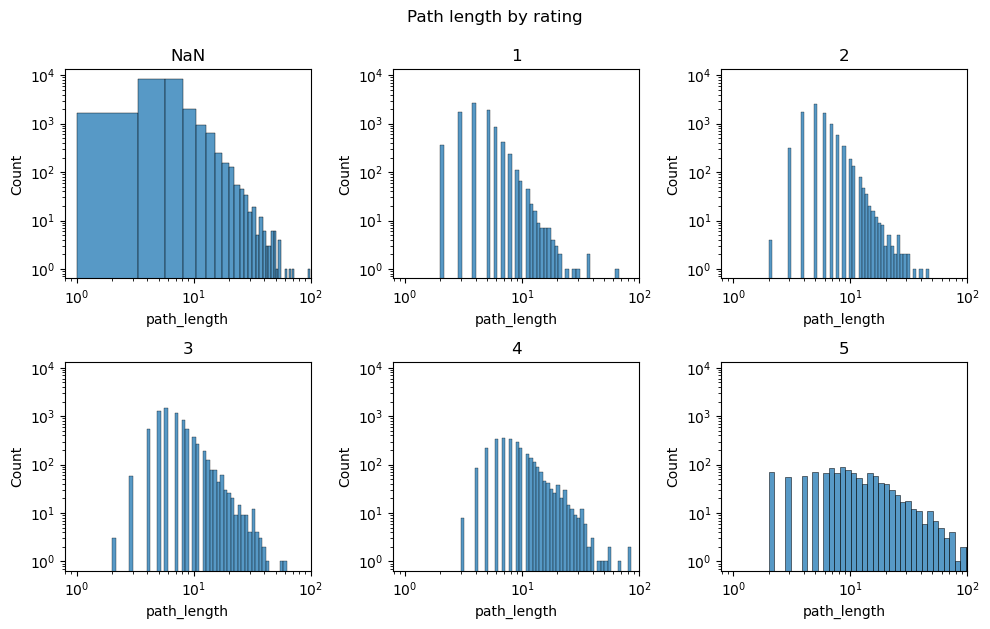

In [80]:
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(231)
sn.histplot(df_finished[df_finished['rating'].isnull()], x='path_length', bins=50)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 100)
plt.title('NaN')


for i in range(1, 6):
    plt.subplot(231+i, sharex = ax1, sharey=ax1)
    sn.histplot(df_finished[df_finished['rating']==i], x='path_length', bins=50)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(i)

plt.tight_layout()
plt.suptitle('Path length by rating', y=1.04)